<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

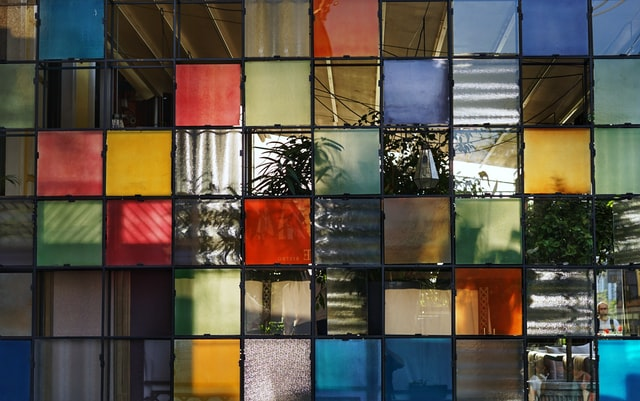<span>Photo by <a href="https://unsplash.com/@diesektion?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Robert Anasch</a> on <a href="https://unsplash.com/@diesektion?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

## Table of Content
- **<a href="#2.6">Feature Selection</a>**
  - **<a href="#2.6.1">Filter Method</a>**
    - **<a href="#2.6.1.1">Pearson Correlation</a>**
    - **<a href="#2.6.1.2">LDA (Linear Discriminant Analysis)</a>**
    - **<a href="#2.6.1.3">ANOVA</a>**
    - **<a href="#2.6.1.4">Chi-square</a>**
    - **<a href="#2.6.1_">Final Conclusion of Filter Method</a>**
  - **<a href="#2.6.2">Wrapper Method</a>**
    - **<a href="#2.6.2">Forward Selection</a>**
    - **<a href="#2.6.2">Backward elimination</a>**
    - **<a href="#2.6.2">RFE (Recursive Feature Elimination)</a>**
  - **<a href="#2.6.3">Embedded Method</a>**
    - **<a href="#2.6.2">L1-based feature selection (Lasso)</a>**
    - **<a href="#2.6.2">Tree-based feature selection</a>**

<a id="2.6"></a>
## 2.6 Feature Selection
Making the right choices about which variable to choose for your predictive models is very much important in feature engineering process.

Feature selection plays a vital role in creating an effective predictive model and broadly categories into 3 method:
- **Filter Method**
- **Wrapper Method**
- **Embedded Method**

**Dataset:** The boston house-prices dataset from sklearn (regression)

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns

#Loading the dataset
df = load_boston()
data = pd.DataFrame(df.data, columns = df.feature_names)
data["MEDV"] = df.target

#Feature Matrix
X = data.drop("MEDV",1)

 #Target Variable
y = data["MEDV"]

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<a id="2.6.1"></a>
### 2.6.1 Filter Method
Filter methods generally used in a preprocessing step. The selection of features is independent of any machine learning algorithms. However, selection of features are based upon their scores in various statistical tests for their correlation with the target variable. The block diagram shows the working mechanism of `Filter Method`

<img src="FeatureEng_Imgs/FE3.png" width="600"/>

**Respective of Continuous & Categorical variables these approach can be applied;**

|Feature\Response|Continuous|Categorical|
|-|-|-|
|Continuous|Pearson’s Correlation|LDA|
|Categorical|ANOVA|Chi-Square|

- It used to filter and consider only the subset of relevant features. 
- After selecting the features, the model is built. 
- Here, the filtering is done using correlation matrix and it is most commonly done using `Pearson correlation`.

<a id="2.6.1.1"></a>
#### Pearson Correlation

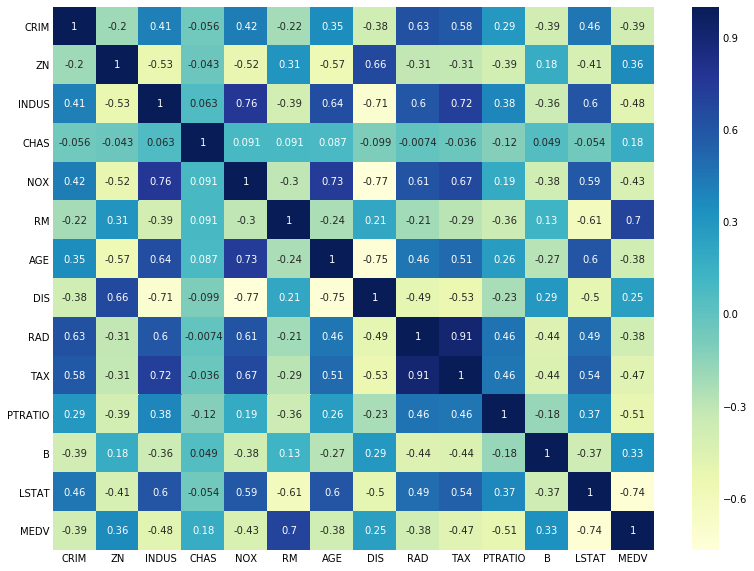

In [2]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [3]:
#Correlation with output variable
target_corr = abs(corr["MEDV"])

#Selecting highly correlated features which value greater than 0.5
relevant_features = target_corr[target_corr>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

>**Note:** The Pearson correlation coefficient has values ranges from -1 to 1
- A value exact 0 indicates no correlation
- A value closer to 0 indicates weaker correlation 
- A value closer to 1 indicates stronger positive correlation
- A value closer to -1 indicates stronger negative correlation

<a id="2.6.1.2"></a>
#### LDA (Linear Discriminant Analysis)
- [Linear discriminant analysis (LDA)](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) is a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. 
- The resulting combination may be used as a `linear classifier`, or, more commonly, for `dimensionality reduction` before later classification.
- `LDA` is also closely related to `principal component analysis (PCA)` and factor analysis in that they both look for linear combinations of variables which best explain the data.
- The `Scikit-Learn` library contains built-in classes for performing LDA on the dataset. Here we will apply LDA on the `Iris dataset`.

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data = pd.read_csv(url, names=names)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

## Divides data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
## Perform feature scaling for LDA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
## Perform LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2) ## Number of LDA compnents
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [8]:
## Training and Making Predictions using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


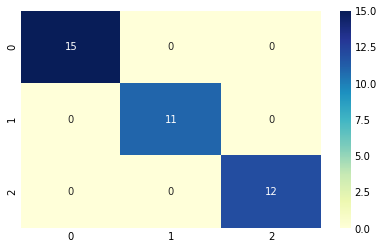


Accuracy: 1.0


In [9]:
## Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

print('\nAccuracy: ' + str(accuracy_score(y_test, y_pred)))

>**Note:** In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

>**Note:** It is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data.

<a id="2.6.1.3"></a>
#### ANOVA

- Analysis of variance [(ANOVA)](https://en.wikipedia.org/wiki/Analysis_of_variance) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample. 
- In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

- The `scikit-learn` library provides an implementation of the `ANOVA f-test` in the [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features which have largest values via the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class.

**Example**, we use `diabetes` dataset and define the `SelectKBest` class to use the `f_classif()` function and select all features, then performing transform of train and test data.

In [10]:
# Example of anova f-test feature selection for numerical data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset as a pandas DataFrame
data = pd.read_csv('Datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
## split into input (X) and output (y) variables
## Feature Matrix
X = data.drop("Outcome",1)

## Target Variable
y = data["Outcome"]

In [12]:
## split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
## Configure to select all the features
fs = SelectKBest(score_func=f_classif, k='all').fit(X_train, y_train) ## Selecting all features


Feature 0: 25.761747
Feature 1: 165.563305
Feature 2: 4.610080
Feature 3: 2.827466
Feature 4: 9.312464
Feature 5: 63.284326
Feature 6: 12.625109
Feature 7: 50.624447


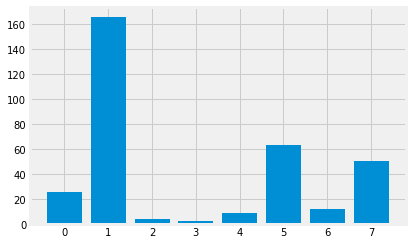

In [20]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

>**Note:** Features 1, 5, and 7 are seems to be most relevant. Perform `SelectKBest(score_func=f_classif, k=4)`for top 4 features.

>**Note:** ANOVA is the synthesis of several ideas and it is used for multiple purposes. As a consequence, it is difficult to define concisely or precisely.

<a id="2.6.1.4"></a>
#### Chi-square

- A [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test) test, also written as $χ^2$ test, is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof.
- Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.
- Chi-square test is used for categorical features in a dataset. The calculation of Chi-square [(`chi2` from sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2) is done between each feature and the target, then select the desired number of features with best Chi-square scores using `SelectKBest` from sklearn.

Chi-square score is given by :

$$χ^2=(Observed Frequency-Expected Frequency)^2/Expected Frequency$$ 

In [15]:
# Load libraries 
from sklearn.datasets import load_iris 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import matplotlib.pyplot as plt
import pandas as pd

# Load iris data 
df = load_iris() 
data = pd.DataFrame(df.data, columns = df.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# Create features and target 
X = df.data 
y = df.target 

# Converting data to integers to get categorical values (Chi-square works with categorical values) 
X = X.astype(int) 
pd.DataFrame(X).head()

,0,1,2,3
0,5,3,1,0
1,4,3,1,0
2,4,3,1,0
3,4,3,1,0
4,5,3,1,0


In [17]:
# Two features with highest chi-squared statistics values are selected 
chi2_f = SelectKBest(chi2, k = 2) 

## Get X_kbest features after fit & transform of X data
X_kbest = chi2_f.fit_transform(X, y) 

# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest.shape[1]) 


Original feature number: 4
Reduced feature number: 2


Feature 0: 10.287129
Feature 1: 5.022670
Feature 2: 133.068548
Feature 3: 74.279070


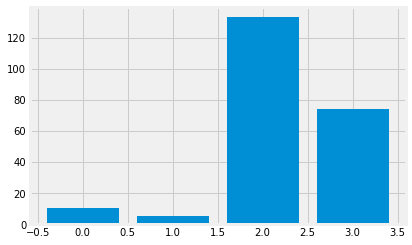

In [18]:
# what are scores for the features
for i in range(len(chi2_f.scores_)):
    print('Feature %d: %f' % (i, chi2_f.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(chi2_f.scores_))], chi2_f.scores_)
plt.show()

<a id="2.6.1_"></a>
>**Note:** Two features with highest chi-squared statistics values are selected 

**Final Conclusion of Filter Method**
- increased the interpretability of the model.
- reduced the complexity of the model.
- reduced the training time of the model.

<a id="2.6.2"></a>
### 2.6.2 Wrapper Method

As [wrapper methods](https://en.wikipedia.org/wiki/Feature_selection) train a new model for each subset, they are very computationally intensive, but usually provide the best performing feature set for that particular type of model or typical problem. The block diagram shows the working mechanism of `Wrapper Method`
<img src="FeatureEng_Imgs/FE4.png" width="600"/>

The evaluation criterion is simply the performance measure which depends on the type of problem.

>**Regression evaluation criterion**
>- p-values
- R-squared
- Adjusted R-squared

>**classification evaluation criterion**
>- Accuracy
- Precision
- Recall
- F1-score, etc. 

**Most commonly used techniques under wrapper methods are:**
- **Forward selection**
- **Backward elimination**
- **Recursive Feature elimination**

<a id="2.6.2.1"></a>
#### Forward Selection

- Here, we start with a null model and then start fitting the model with each feature one at a time and select the feature with the minimum p-value. 
- Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. 
- Now fit a model with three features by trying combinations of two previously selected features with other remaining features.
- Repeat this process until we have a set of selected features with a p-value of individual feature less than the significance level.

Install mlxtend for Forward selection & Backward elimination
```cmd
pip install mlxtend
```

In [21]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['Price'] = boston.target

## feature matrix 
X = data.drop("Price", 1)  

## target feature
y = data['Price']               
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs), forward = True and floating = False are for forward selection technique.
sfs = SFS(LinearRegression(),
           k_features=11,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)## cv corresponds cross validation

In [23]:
sfs.fit(X, y)

# to get the final set of features
print('Feature Names: ',sfs.k_feature_names_)  

Feature Names:  ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


In [24]:
# to get the Accuracy score
print('Accuracy value: ',sfs.k_score_) 

Accuracy value:  0.7405822802569575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


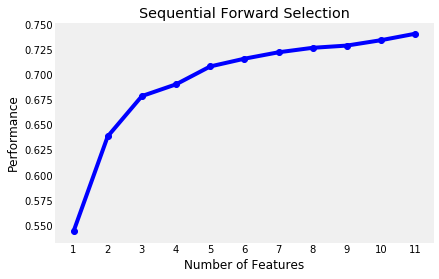

In [25]:
##The visualization can be achieved through `plot_sequential_feature_selection()` function available in mlxtend.plotting module.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

>**Note:** After increasing k_features value from 11, model is not able to increase the Accuracy. Finally selected `k_features=11`

>**Note:** `k_features` indicates the selected number of features. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores different of features.

<a id="2.6.2.2"></a>
#### Backward elimination

In [31]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Sequential Forward Selection(sfs), forward = False and floating = False are for forward selection technique.
sfs = SFS(LinearRegression(),
           k_features=11,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)## cv corresponds cross validation

In [32]:
sfs.fit(X, y)

# to get the final set of features
print('Feature Names: ',sfs.k_feature_names_)  

Feature Names:  ('LSTAT',)


In [33]:
# to get the Accuracy score
print('Accuracy value: ',sfs.k_score_) 

Accuracy value:  0.5441462975864797


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


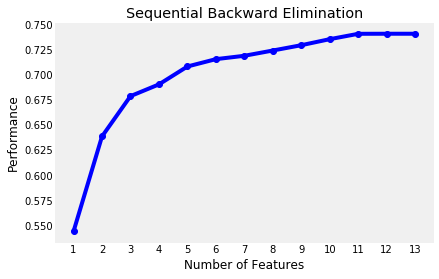

In [34]:
##The visualization can be achieved through `plot_sequential_feature_selection()` function 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()

## To get graph from 1 to 13 feature, provide k_features=11

>**Note:** After applying several k_features value, 11 found to be optimal feature number for this model Accuracy. Finally selected `k_features=11`

>**Note:** `k_features` indicates the selected number of features. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores different of features.

<a id="2.6.2.3"></a>
#### RFE (Recursive Feature Elimination)
- It works by recursively removing attributes and building a model on those attributes that remain. 
- It uses accuracy metric to rank the feature according to their importance. 
- The RFE method takes the model to be used and the number of required features as input. 
- It support ranking (`1` - Higher, `2` - lower than 1) and, True for relevant feature and False for irrelevant feature.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

LR_model = LinearRegression()
#Initializing RFE model
rfe = RFE(LR_model, 6) #Here randomly we selected feature number 10

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
LR_model.fit(X_rfe,y)
print('Support: ',rfe.support_)
print('Ranking: ',rfe.ranking_)
print('RFE Accuracy: ',rfe.score(X,y))

Support:  [False False False  True  True  True False  True False False  True False
  True]
Ranking:  [3 5 4 1 1 1 8 1 2 6 1 7 1]
RFE Accuracy:  0.7157742117396082


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


***To get optimal number of feature, we need to iterate over feature number***

In [36]:
score=[]
for i in range(1,X.shape[1]+1):
    
    #Initializing RFE model
    rfe = RFE(LR_model, i) 

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  

    #Fitting the data to model
    LR_model.fit(X_rfe,y)
    
    ## Geting accuracy
    val=rfe.score(X,y)
    
    score.append(val)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:7

[0.1826030425016988, 0.535438013080613, 0.5555737130590868, 0.6156465556218185, 0.6336210768240027, 0.7157742117396082, 0.7171450343413888, 0.7232588148621941, 0.72434488837625, 0.728290740634622, 0.7342674984601643, 0.7406412165505145, 0.7406426641094095]


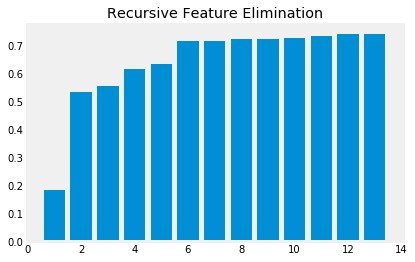

In [37]:
## Visulize score w.r.t considered number of features
import matplotlib.pyplot as plt

plt.bar(range(1,X.shape[1]+1),score)
plt.title('Recursive Feature Elimination')
plt.grid()
plt.show()

As per graphical analysis and obtained accuracy the optimal number of features can be considered

<a id="2.6.3"></a>
### 2.6.3 Embedded Methods
[Embedded methods](https://en.wikipedia.org/wiki/Feature_selection) have been recently proposed that try to combine the advantages of both previous methods. A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification simultaneously. 
- They are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. 
- Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
<img src="FeatureEng_Imgs/FE5.png" width="600"/>
>**Note:** The major advantage of `ridge regression` is coefficient shrinkage and reducing model complexity, while `Lasso` along with shrinking coefficients, lasso performs feature selection as well.

<a id="2.6.3.1"></a>
#### L1-based feature selection (Lasso)
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with [`feature_selection.SelectFromModel`](https://scikit-learn.org/stable/modules/feature_selection.html) to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the `linear_model.Lasso` for regression, and of `linear_model.LogisticRegression` and `svm.LinearSVC` for classification.

In [38]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

## Loading iris dataset
X, y = load_iris(return_X_y=True)

print('Intial data shape',X.shape)

## Model building
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)

## Getting reduced number of feature by lasso
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)

print('Final data shape',X_new.shape)

Intial data shape (150, 4)
Final data shape (150, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<a id="2.6.3.2"></a>
#### Tree-based feature selection

`Tree-based estimators` (the [`sklearn.tree`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) module and forest of trees in the [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) module) can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (when coupled with the [`sklearn.feature_selection.SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) meta-transformer)

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

## Loading iris dataset
X, y = load_iris(return_X_y=True)
print('Intial data shape',X.shape)

Intial data shape (150, 4)


In [40]:
## Model building
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print('feature importance',clf.feature_importances_)

feature importance [0.10004045 0.07256392 0.44585053 0.38154511]


In [41]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print('Final data shape',X_new.shape)

Final data shape (150, 2)


Here, we got reduced number of feature by Tree-based feature selection